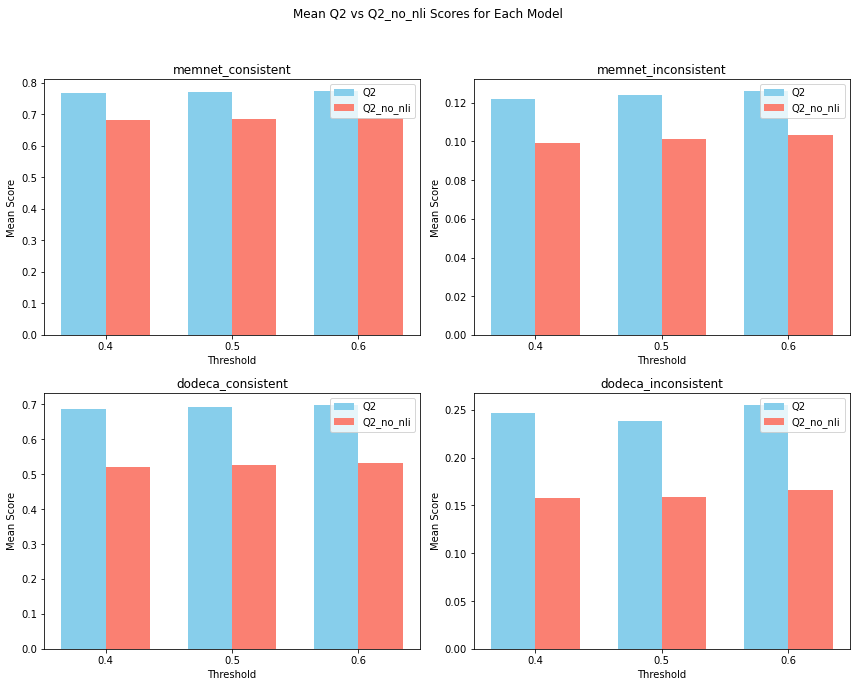

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "DifferentNLI"

thresholds = {
    '0.4': '_scores4.csv',
    '0.5': '_scores.csv',
    '0.6': '_scores6.csv'
}

models = ['memnet_consistent', 'memnet_inconsistent', 'dodeca_consistent', 'dodeca_inconsistent']

# Store mean scores per model, per threshold
data_by_model = {model: {'Threshold': [], 'Q2': [], 'Q2_no_nli': []} for model in models}

for thresh, suffix in thresholds.items():
    folder = os.path.join(base_dir, f"{thresh}NLI")

    for model in models:
        file_path = os.path.join(folder, f"{model}{suffix}")
        if not os.path.exists(file_path):
            print(f"[Missing] {file_path}")
            continue

        df = pd.read_csv(file_path)

        q2_no_nli_col = df.columns[-2]
        q2_col = df.columns[-1]

        q2_mean = df[q2_col].mean()
        q2_no_nli_mean = df[q2_no_nli_col].mean()

        data_by_model[model]['Threshold'].append(thresh)
        data_by_model[model]['Q2'].append(q2_mean)
        data_by_model[model]['Q2_no_nli'].append(q2_no_nli_mean)

# Plot one graph per model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, model in enumerate(models):
    ax = axes[idx]
    thresholds = data_by_model[model]['Threshold']
    q2 = data_by_model[model]['Q2']
    q2_no_nli = data_by_model[model]['Q2_no_nli']

    x = range(len(thresholds))
    bar_width = 0.35

    ax.bar([i - bar_width/2 for i in x], q2, width=bar_width, label='Q2', color='skyblue')
    ax.bar([i + bar_width/2 for i in x], q2_no_nli, width=bar_width, label='Q2_no_nli', color='salmon')

    ax.set_xticks(x)
    ax.set_xticklabels(thresholds)
    ax.set_title(model)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Mean Score')
    ax.legend()

plt.suptitle("Mean Q2 vs Q2_no_nli Scores for Each Model")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [7]:
import os
import pandas as pd
from tabulate import tabulate

folder = "E2E Score"

models = {
    'dodeca_consistent_with_e2e_baseline.csv': ('dodeca', 'Consistent'),
    'dodeca_inconsistent_with_e2e_baseline.csv': ('dodeca', 'Inconsistent'),
    'memnet_consistent_with_e2e_baseline.csv': ('MemNet', 'Consistent'),
    'memnet_inconsistent_with_e2e_baseline.csv': ('MemNet', 'Inconsistent'),
}

summary_rows = []

for filename, (system, data_type) in models.items():
    file_path = os.path.join(folder, filename)
    
    if not os.path.exists(file_path):
        print(f"Missing: {file_path}")
        continue

    df = pd.read_csv(file_path)

    # Identify the last 3 columns
    q2_no_nli_col = df.columns[-3]
    q2_col = df.columns[-2]
    e2e_col = df.columns[-1]

    total_questions = len(df)
    q2_mean = round(df[q2_col].mean(), 3)
    q2_no_nli_mean = round(df[q2_no_nli_col].mean(), 3)
    e2e_mean = round(df[e2e_col].mean(), 3)

    summary_rows.append([system, data_type, total_questions, q2_mean, q2_no_nli_mean, e2e_mean])

summary_df = pd.DataFrame(summary_rows, columns=[
    "System", "Data", "# Questions", "Q²", "Q² w/o NLI", "E2E NLI"
])

print(tabulate(summary_df, headers='keys', tablefmt='github', showindex=False))


| System   | Data         |   # Questions |    Q² |   Q² w/o NLI |   E2E NLI |
|----------|--------------|---------------|-------|--------------|-----------|
| dodeca   | Consistent   |           150 | 0.692 |        0.525 |     0.667 |
| dodeca   | Inconsistent |           150 | 0.238 |        0.159 |     0.431 |
| MemNet   | Consistent   |           150 | 0.771 |        0.684 |     0.656 |
| MemNet   | Inconsistent |           150 | 0.124 |        0.101 |     0.32  |
